## Analysis of Pf,Psf,Pf_new

In [1]:
####################################################### Imports ####################################################### 

import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from scipy.special import comb


In [2]:
###################################################### Constants ###################################################### 

# The variable values
EPSILON                     = 10**-2
THRESHOLD                   = 5
FRAMES                      = 10
BITS                        = 100
SAMPLES_NUMBER              = 10**3

# The range of the variables
EPSILON_LINESPACE_RANGE     = EPSILON/2
EPSILON_LINESPACE_SAMPLES   = SAMPLES_NUMBER
THRESHOLD_RANGE             = int(THRESHOLD/2)
FRAMES_RANGE                = int(FRAMES/2)
FRAMES_LINESPACE_SAMPLES    = 2 * FRAMES_RANGE
BITS_RANGE                  = int(BITS/2)
BITS_LINESPACE_SAMPLES      = 2 * BITS_RANGE

# The order of handling the variables 
linespaces_names  = ['epsilon', 't','m', 'n']
parameters_consts = [EPSILON, THRESHOLD, FRAMES, BITS]
linespaces        = {'epsilon': (EPSILON_LINESPACE_RANGE, EPSILON_LINESPACE_SAMPLES),
                     't'      : (THRESHOLD_RANGE),
                     'm'      : (FRAMES_RANGE),
                     'n'      : (BITS_RANGE)}

# The different calculations needed & the different parameters allocated to them by order
functions_names   = ['Pf', 'Psf','Psf_new']
functions_op_num  = {'Pf'     : (0, 1,3),
                     'Psf'    : (2,3),
                     'Psf_new': (1,2)}

In [3]:
################################################################################### 
# The function calculate the ranges of the different parameters to draw
################################################################################### 
def get_vars_to_func(change_var_index):       
    
    epsilond_to_calc  = parameters_consts[0]   
    threshold_to_list = parameters_consts[1]
    frames_to_calc    = parameters_consts[2]                  
    bits_to_list      = parameters_consts[3]
    threshold_to_calc = []
    threshold_to_calc.append(threshold_to_list)
    bits_to_calc = []
    bits_to_calc.append(bits_to_list)
    x                 = 0
    
    # The epsilon is continuous value therefor it's range is calculated with linspace. 
    # The other parameters are discrete and calculated with range.
    if change_var_index == 0:
        epsilond_to_calc  = np.linspace(parameters_consts[0] - linespaces[linespaces_names[0]][0], \
                                           parameters_consts[0] + linespaces[linespaces_names[0]][0], \
                                           linespaces[linespaces_names[0]][1])
        x                 = epsilond_to_calc
    elif change_var_index == 1:
        threshold_to_calc = range(1, THRESHOLD + 2*THRESHOLD_RANGE +1)
        threshold_to_calc = np.asarray(threshold_to_calc)
        x                 = threshold_to_calc
    elif change_var_index == 2:
        frames_to_calc    = range(FRAMES - FRAMES_RANGE, FRAMES + 2*FRAMES_RANGE + 1)
        frames_to_calc = np.asarray(frames_to_calc)
        x                 = frames_to_calc
    elif change_var_index == 3:
        bits_to_calc      = range(BITS - BITS_RANGE, BITS + BITS_RANGE + 1)
        bits_to_calc = np.asarray(bits_to_calc)
        x                 = bits_to_calc
        
    return  epsilond_to_calc, threshold_to_calc, frames_to_calc, bits_to_calc, x

################################################################################### 
# The frame error probability
################################################################################### 
def Pf_probability(epsilon, j, n):
    result = []
    for curr_n in n:
        for threshold in j:
            sum = 0
            for i in range(threshold+1):
                sum += comb(curr_n, i, exact=True) * epsilon**i * (1-epsilon)**(curr_n-i)
            result.append(sum)
    
    return 1 - np.squeeze(np.asarray(result))

################################################################################### 
# The super frame error probability
################################################################################### 
def Psf_probability(epsilon, j, m, n):   
    return 1 - (1-Pf_probability(epsilon, j, n))**m

################################################################################### 
# The new super frame error probability
################################################################################### 
def Psf_new_probability(epsilon, j, m, n):   
    return 1 - ((1-Pf_probability(epsilon, j, n))**m + \
                 m*Pf_probability(epsilon, j, n)*(1-Pf_probability(epsilon, j, n))**(m-1))

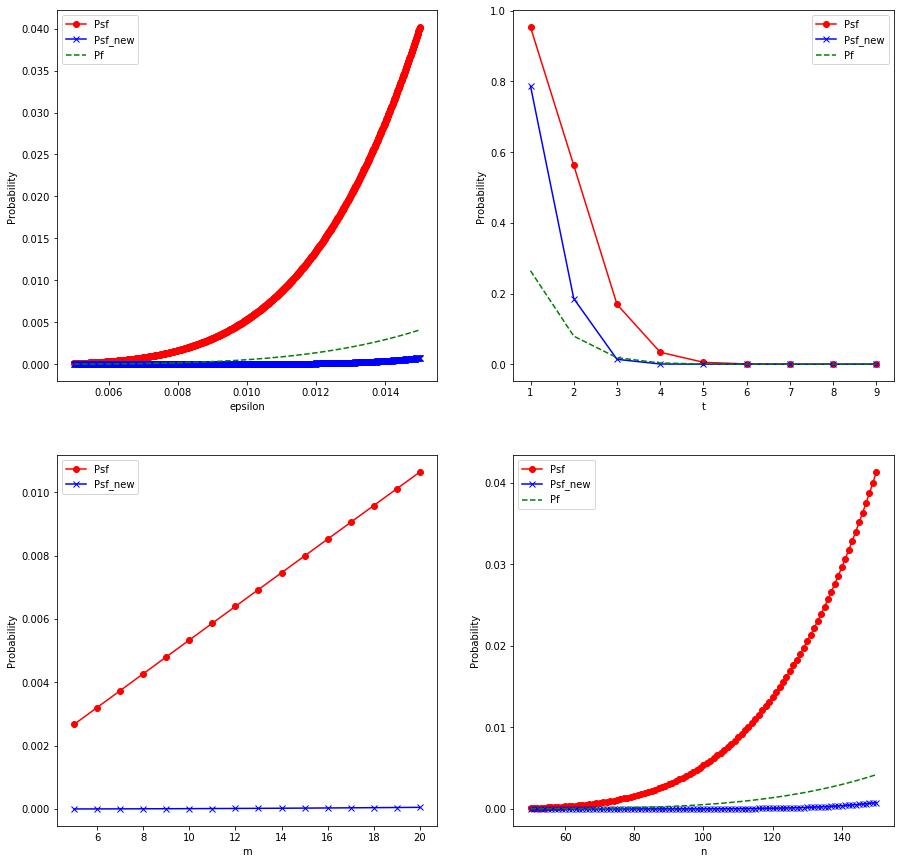

In [6]:
def draw_function():
     
    # set the first parameters to be calculated
    var_index = 0
    epsilond_to_calc, threshold_to_calc, frames_to_calc, bits_to_calc, x = get_vars_to_func(var_index)   
    
    # plot the graphs for each parameter
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
    for row in ax:
        for col in row:      
            col.plot(x, Psf_probability(epsilond_to_calc, threshold_to_calc,frames_to_calc, bits_to_calc),'r-o',label="Psf")
            col.plot(x, Psf_new_probability(epsilond_to_calc, threshold_to_calc,frames_to_calc, bits_to_calc),'b-x',label="Psf_new")
            col.set_xlabel(linespaces_names[var_index])
            col.set_ylabel("Probability")

            # The functions without the 'm' parameter should not be calculated in the graph that checking it
            if var_index  in functions_op_num[functions_names[0]]:
                col.plot(x, Pf_probability(epsilond_to_calc, threshold_to_calc, bits_to_calc),'g--',label="Pf")
            col.legend(numpoints=1)
            
            # Get the next patameter to draw
            var_index += 1
            epsilond_to_calc, threshold_to_calc, frames_to_calc, bits_to_calc, x = get_vars_to_func(var_index)

    plt.show()

# Calling the drawing function
draw_function()

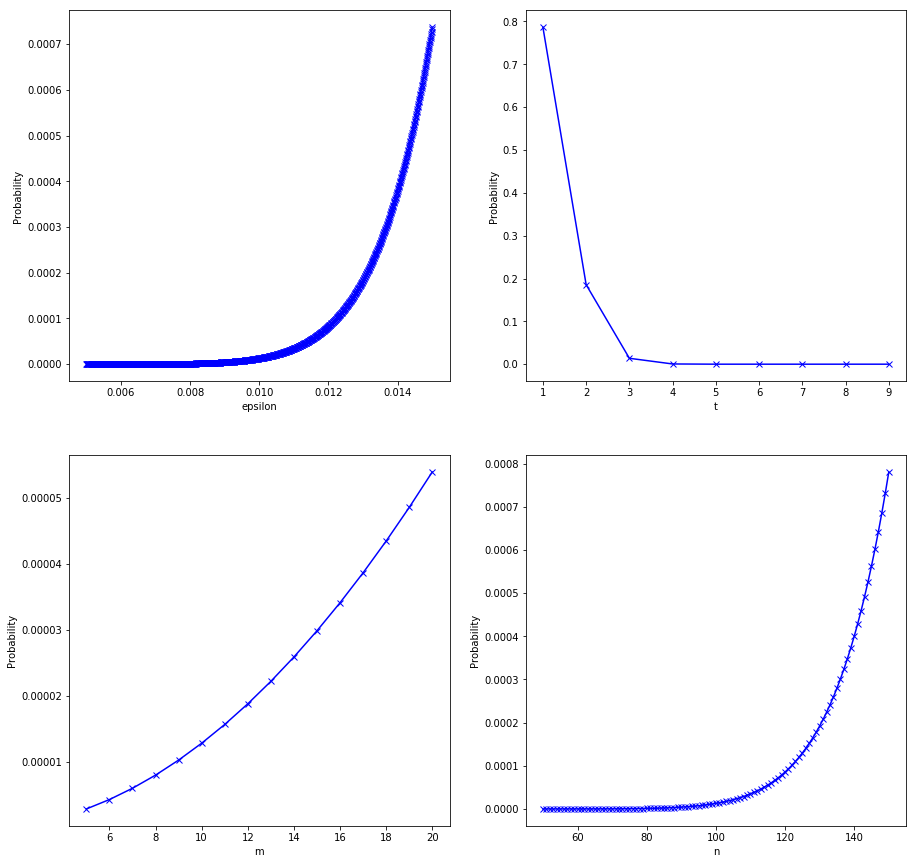

In [7]:
def draw_only_Pfs_function():
     
    # set the first parameters to be calculated
    var_index = 0
    epsilond_to_calc, threshold_to_calc, frames_to_calc, bits_to_calc, x = get_vars_to_func(var_index)   
    
    # plot the graphs for each parameter
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
    for row in ax:
        for col in row:      
            col.plot(x, Psf_new_probability(epsilond_to_calc, threshold_to_calc,frames_to_calc, bits_to_calc),'b-x',label="Psf_new")
            col.set_xlabel(linespaces_names[var_index])
            col.set_ylabel("Probability")

            # Get the next patameter to draw
            var_index += 1
            epsilond_to_calc, threshold_to_calc, frames_to_calc, bits_to_calc, x = get_vars_to_func(var_index)

    plt.show()

# Calling the drawing function only for Pfs scale
draw_only_Pfs_function()